# <span style="color:green">Geolocalisation -  Notebook 2.1 Modelling genomic data - SUBSPECIES</span>

## <span style="color:green">0. Load packages and data stored as pkl</span>

In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import balanced_accuracy_score, accuracy_score, average_precision_score, f1_score

# If should be df_c2_filtPos80filtSamp70 but for abbreviation we will made it df_train_c
df = pd.read_pickle("../data/df_c2_filtPos80filtSamp70.pkl.gz", compression="infer") # Import object with pickle

geo = pd.read_csv("../data/Sample_localisation_extended.csv") # Data with geolocalisation

In [7]:
df.shape

(346, 288274)

## <span style="color:green">1. Formatting the data</span>
### <span style="color:green">1.1 Obtain distribution of mean values</span>

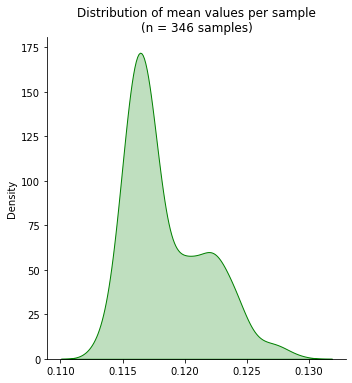

In [122]:
sns.displot(df.mean(axis=1), color="green", kind="kde", fill = True).set(title = "Distribution of mean values per sample\n(n = 346 samples)")

### <span style="color:green">1.2 Replace NaN by mean of columns and rows</span>

In [103]:
mean_val=df.iloc[:,].mean().mean()
df = df.replace(np.nan, mean_val)
#df.to_csv('./pkl/df_c2_filtPos80filtSamp70_meanval.csv.gz', index = True, compression='infer')

## <span style="color:green">2. Modelling </span>
#### <span style="color:green">Define X and y variables</span>

In [104]:
# Set seed
import random
random.seed(1)

names = df.axes[0].tolist() # Names of samples
geo = geo.reset_index().set_index('ExtractID').loc[names].reset_index().set_index('index') # Extract geo rows that are in names

y = geo.iloc[:,5:6] # For subspecies
X = df.reset_index(drop = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# To make sure that dimensions are ok
print(X_train.shape)
print(X_test.shape)
print(len(y_train))
print(len(y_test))

(276, 288274)
(70, 288274)
276
70


### <span style="color:green">2.1 Random forest</span>

In [111]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

# Train + predict
rf_clf = RandomForestClassifier(random_state = 1)
rf_y_pred = rf_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The rf_clf model has an accuracy of", rf_clf.score(X_train,y_train), "in the data it has been trained.")

print("Balanced accuracy:", balanced_accuracy_score(y_test, rf_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, rf_y_pred, average = 'micro')) 

The rf_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0
F1-score (micro) on the prediction: 1.0


<span style="color:green">The Random Forest classifier shows an accuracy of 1 for the classification at the subspecies level.</span>

Text(0.5, 1.0, 'Confusion matrix Random Forest Classifier')

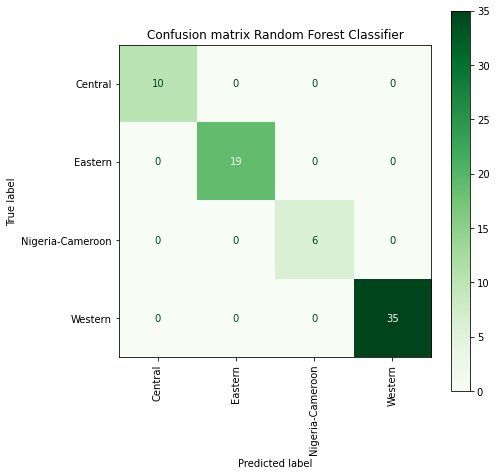

In [206]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, rf_y_pred, labels=rf_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Random Forest Classifier")

In [172]:
rf_clf.classes_

array(['Central', 'Eastern', 'Nigeria-Cameroon', 'Western'], dtype=object)

In [163]:
rf_clf.classes_

array(['Central', 'Eastern', 'Nigeria-Cameroon', 'Western'], dtype=object)

### <span style="color:green">2.2 Nearest Neighbors</span>

In [127]:
from sklearn.neighbors import KNeighborsClassifier

# Train + predict
nn_clf = KNeighborsClassifier(n_neighbors = 4)
nn_y_pred = nn_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The nn_clf model has an accuracy of", nn_clf.score(X_train,y_train), "in the data it has been trained.")
print("Balanced accuracy:", balanced_accuracy_score(y_test, nn_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, nn_y_pred, average = 'micro')) 

The nn_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0
F1-score (micro) on the prediction: 1.0


<span style="color:green">Nearest Neighbors also show high performance.</span>

Text(0.5, 1.0, 'Confusion matrix Nearest Neighbors')

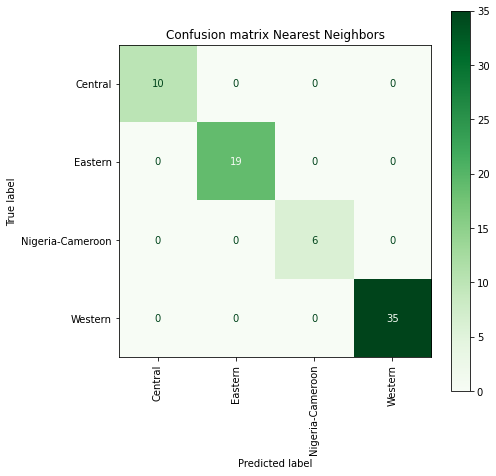

In [207]:
cm = confusion_matrix(y_test, rf_y_pred, labels=nn_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=nn_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Nearest Neighbors")

### <span style="color:green">2.3 Support vector machine</span>

In [118]:
from sklearn.svm import LinearSVC

# Train + predict
svm_clf = LinearSVC(random_state=1)
svm_y_pred = svm_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The svm_clf model has an accuracy of", svm_clf.score(X_train,y_train), "in the data it has been trained.")

print("Balanced accuracy:", balanced_accuracy_score(y_test, svm_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, svm_y_pred, average = 'micro')) 

The svm_clf model has an accuracy of 1.0 in the data it has been trained.
Balanced accuracy: 1.0
F1-score (micro) on the prediction: 1.0


<span style="color:green">Support vector machine also shows an accuracy and F1-score of 1.</span>

Text(0.5, 1.0, 'Confusion matrix Support Vector Machine')

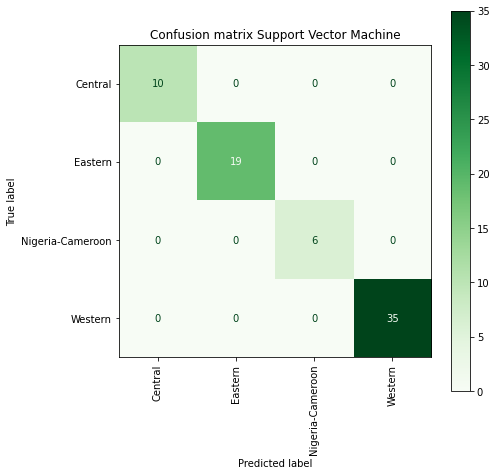

In [208]:
cm = confusion_matrix(y_test, rf_y_pred, labels=svm_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=svm_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Support Vector Machine")

### <span style="color:green">2.4 Categorical Naive Bayes</span>

In [120]:
from sklearn.naive_bayes import CategoricalNB

# Train + predict
cnb_clf = CategoricalNB(min_categories=4)
cnb_y_pred = cnb_clf.fit(X_train, y_train.values.ravel()).predict(X_test)

print("The cnb_clf model has an accuracy of", cnb_clf.score(X_train,y_train), "in the data it has been trained.")

print("Balanced accuracy:", balanced_accuracy_score(y_test, cnb_y_pred)) 
print("F1-score (micro) on the prediction:", f1_score(y_test, cnb_y_pred, average = 'micro')) 

The cnb_clf model has an accuracy of 0.8115942028985508 in the data it has been trained.
Balanced accuracy: 0.5
F1-score (micro) on the prediction: 0.7714285714285715


<span style="color:green">Naive Bayes shows lower performance.</span>

Text(0.5, 1.0, 'Confusion matrix Support Vector Machine')

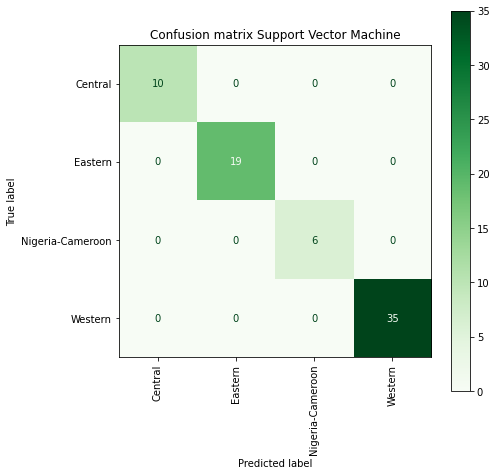

In [209]:
cm = confusion_matrix(y_test, rf_y_pred, labels=cnb_clf.classes_)
cmp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=cnb_clf.classes_)

fig,ax = plt.subplots(figsize=(7,7))

cmp.plot(xticks_rotation = 'vertical', colorbar=True, cmap = "Greens", ax=ax)
cmp.ax_.set_title("Confusion matrix Support Vector Machine")

## <span style="color:green">3. Conclusion </span>
<span style="color:green">Once clean data is available, it is possible use a variety of classifiers for predicting the chimpanzee's subspecies from DNA. Out of the four classifiers tested, random forest, nearest neighbors and support vector machine are the ones which perform best, as all of them yield an accuracy and f1-scores of 1. </span>